<img src="graphics/graphiti.jpeg" width=300 align="right">
<img src="graphics/graphiti_2.jpeg" width=300 align="right">  

# Lab 2. The line of best fit.
How it Thursday, again?! I guess we can do a #TBT. Did you ever plot some illustrations doing Graphiti in elementary school? When's the last time you had to make a scatterplot? Was it after a science lab? Was it for fun (like me?) Was it by hand? Let's learn how to do it in R on the computer.


## Recap
What did we do last time?

1. Load in our data
2. Learned `ggplot2` and `dplyr` syntax
3. Explored `dplyr` summary statistics and column manipulation
4. Made histograms and barplots using `geom_histogram()` and `geom_bar()`


## Goals
This lab will get you drawing dots and lines in R. (We won't be plotting TV's like on the right, but we'll be plotting cool numbers indeed!)

1. Libraries first, otherwise errors come next
2. Load **and look at** in our data

In [4]:
library(dplyr)
library(ggplot2)
library(readr)
library(broom)

In [10]:
CS_data <- read_csv("rstudio-export/Data/Cesarean.csv")
CS_data$Income_Group <- forcats::fct_relevel(CS_data$Income_Group, 
                                            "Low income", "Lower middle income", 
                                            "Upper middle income", "High income: nonOECD", 
                                            "High income: OECD")
head(CS_data)

Parsed with column specification:
cols(
  Country_Name = col_character(),
  CountryCode = col_character(),
  Births_Per_1000 = col_integer(),
  Income_Group = col_character(),
  Region = col_character(),
  GDP_2006 = col_double(),
  CS_rate = col_double()
)


Country_Name,CountryCode,Births_Per_1000,Income_Group,Region,GDP_2006,CS_rate
Albania,ALB,46,Upper middle income,Europe & Central Asia,3051.768,0.256
Andorra,AND,1,High income: nonOECD,Europe & Central Asia,42417.229,0.237
United Arab Emirates,ARE,63,High income: nonOECD,Middle East & North Africa,42950.101,0.100
Argentina,ARG,689,High income: nonOECD,Latin America & Caribbean,6649.414,0.352
Armenia,ARM,47,Lower middle income,Europe & Central Asia,2126.619,0.141
Australia,AUS,267,High income: OECD,East Asia & Pacific,36100.559,0.303


In [11]:
CS_data <- CS_data %>% mutate(CS_rate_100 = CS_rate*100)
head(CS_data)

Country_Name,CountryCode,Births_Per_1000,Income_Group,Region,GDP_2006,CS_rate,CS_rate_100
Albania,ALB,46,Upper middle income,Europe & Central Asia,3051.768,0.256,25.6
Andorra,AND,1,High income: nonOECD,Europe & Central Asia,42417.229,0.237,23.7
United Arab Emirates,ARE,63,High income: nonOECD,Middle East & North Africa,42950.101,0.100,10.0
Argentina,ARG,689,High income: nonOECD,Latin America & Caribbean,6649.414,0.352,35.2
Armenia,ARM,47,Lower middle income,Europe & Central Asia,2126.619,0.141,14.1
Australia,AUS,267,High income: OECD,East Asia & Pacific,36100.559,0.303,30.3


**1. Make a scatter plot between `CS_rate_100` and `GDP_2006`:**

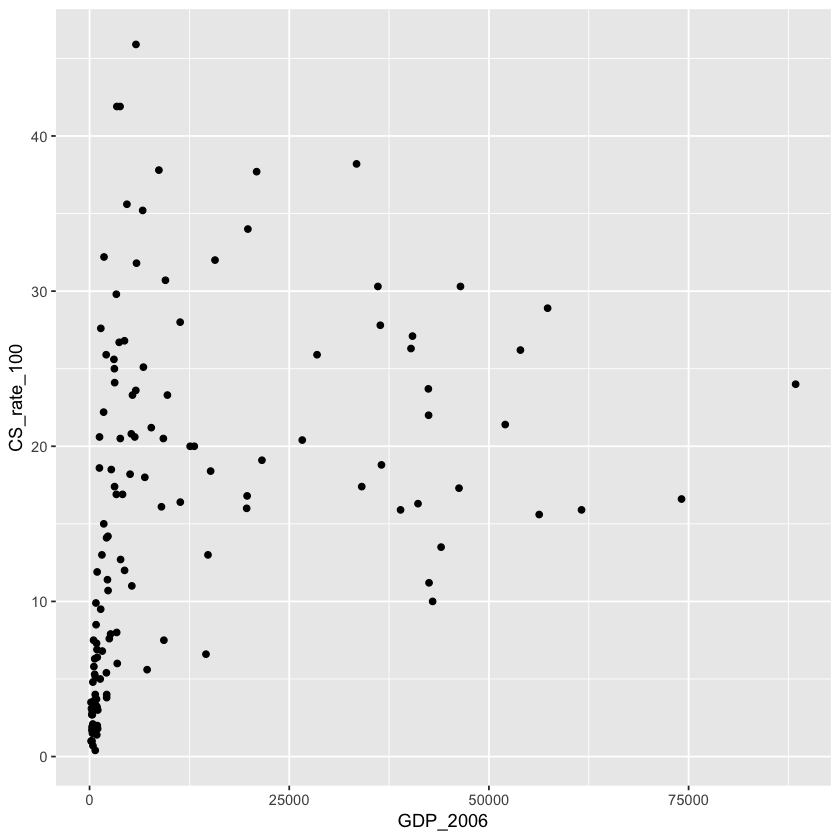

In [12]:
ggplot(CS_data, aes(x=GDP_2006, y=CS_rate_100)) + geom_point()

**2. Using the `mutate()` function, add two new logged variables to the data set
`CS_data`. Call the variables `log_CS` and `log_GDP`. Use base e, also know as 
natural logarithms, to create the logged variables:**

In [14]:
CS_data %>% mutate(log_CS=log(CS_rate_100),
                   log_GDP=log(GDP_2006))

Country_Name,CountryCode,Births_Per_1000,Income_Group,Region,GDP_2006,CS_rate,CS_rate_100,log_CS,log_GDP
Albania,ALB,46,Upper middle income,Europe & Central Asia,3051.7676,0.256,25.6,3.2425924,8.023476
Andorra,AND,1,High income: nonOECD,Europe & Central Asia,42417.2291,0.237,23.7,3.1654750,10.655310
United Arab Emirates,ARE,63,High income: nonOECD,Middle East & North Africa,42950.1006,0.100,10.0,2.3025851,10.667794
Argentina,ARG,689,High income: nonOECD,Latin America & Caribbean,6649.4135,0.352,35.2,3.5610461,8.802284
Armenia,ARM,47,Lower middle income,Europe & Central Asia,2126.6187,0.141,14.1,2.6461748,7.662289
Australia,AUS,267,High income: OECD,East Asia & Pacific,36100.5585,0.303,30.3,3.4111477,10.494064
Austria,AUT,76,High income: OECD,Europe & Central Asia,40430.9936,0.271,27.1,3.2995337,10.607352
Azerbaijan,AZE,166,Upper middle income,Europe & Central Asia,2473.0858,0.076,7.6,2.0281482,7.813222
Belgium,BEL,119,High income: OECD,Europe & Central Asia,38936.3309,0.159,15.9,2.7663191,10.569683
Benin,BEN,342,Low income,Sub-Saharan Africa,557.2294,0.036,3.6,1.2809338,6.322977
